## Analisis de Datos de Pinguinos

Mediciones de tamaño, observaciones de nidadas y proporciones de isótopos en la sangre de pingüinos Adelie, Chinstrap y Gentoo adultos en busca de alimento observados en islas del archipiélago Palmer cerca de la estación Palmer, en la Antártida. Los datos fueron recopilados y puestos a disposición por la Dra. Kristen Gorman y el Programa de Investigación Ecológica a Largo Plazo (LTER) de la Estación Palmer.

In [14]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.formula.api as smf
import statsmodels.stats as ss

### Apariencia de los Graficos

In [18]:
#almacena los graficos en el notebooks
%matplotlib inline 
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

### 1. Cargar los Datos

In [20]:
preprocess_penguins_df = pd.read_csv('./data/penguins.csv')
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### 2. Recoleccion y Validacion de los Datos

In [21]:
# Tipos de datos del dataset
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

Tenemos 4 variables de tipo float, 3 de tipo object y 1 de tipo int

In [22]:
# Cantidad de variables de cada tipo
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

In [23]:
# Cantidad de registros en el dataset
preprocess_penguins_df.shape

(344, 8)

In [24]:
# Variables que contienen valores nulos
(
    preprocess_penguins_df
    .isna()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [26]:
# Cantidad de valores nulos por variable
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [28]:
# Total de valores nulos en el dataset
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

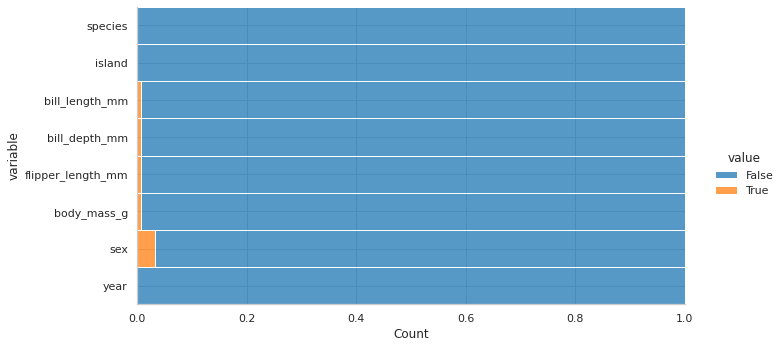

In [33]:
# Proporcion de Valores nulos por cada variable
(
    preprocess_penguins_df
    .isnull()
    .melt()  # Convierte un df de formato ancho a formato largo
    .pipe(   # permite aplicar una o mas funciones al objeto df 
        lambda df:(
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2 #ancho del grafica
            )
        )
    )
)